In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import imread
from matplotlib.pyplot import figure
import random

# Simultaneous Case
## Training data Loading

In [3]:
with open('4L/TR/MultiCoor.pkl', 'rb') as f:
    coor = pickle.load(f)
    
drones = []
QEntries = []
for i in range(4):
    with open(f'4L/TR/ExperimentSim3R/crazyflie{i}.pkl', 'rb') as f:
        crazy = pickle.load(f)
        drones.append(crazy)
        

## Data preparation

Checking the different entries for any discrepancy

In [5]:
newDrones = []
for j in range(len(drones)):
    crazy = drones[j]
    recent = 0
    new = [crazy[0]]
    for i in range(len(crazy)):
        if i == 0:
            continue

        if crazy[i-1][1] == crazy[i][1]:
            continue

        new.append(crazy[i])
    print(len(crazy))
    print(len(new))
    newDrones.append(new)

1000
1000
1000
1000
1000
1000
1000
1000


Calculating the run search times by taking the difference from the previous to the next iteration

In [7]:
for i in range(len(coor)):
    if i == 0:
        continue
    
    coor[i-1][1] = coor[i][1]-coor[i-1][1]

coor.pop(-1)


[474, 1746956181.2048564]

Removing all runs with human intervention (>800 seconds)

In [9]:
pops = []
for i in reversed(range(len(coor))):
    if coor[i][1] > 800:
        pops.append(i)
        for x in range(len(newDrones)):
            newDrones[x].pop(i)
            
        print(coor[i])
        coor.pop(i)
print(len(pops))        

[960, 18836.32005906105]
[893, 5920.729817390442]
[867, 18578.209816217422]
[812, 6432.869829654694]
[526, 1259250.3316857815]
[525, 13882.300055980682]
[487, 4387.2100694179535]
[455, 3610.320125579834]
[452, 2341.97958779335]
[425, 40153.61410570145]
[397, 14405.980347394943]
[332, 818.0698158740997]
[276, 34025.76830101013]
[150, 2572.719977378845]
[101, 39677.8699195385]
[64, 4148.159823656082]
[48, 16718.389788389206]
[31, 25589.609694957733]
[26, 22252.03031349182]
19


## Plotting

### Training Time
plotting time per iteration

33.35000705718994
749.3102571964264
256.2568089147834


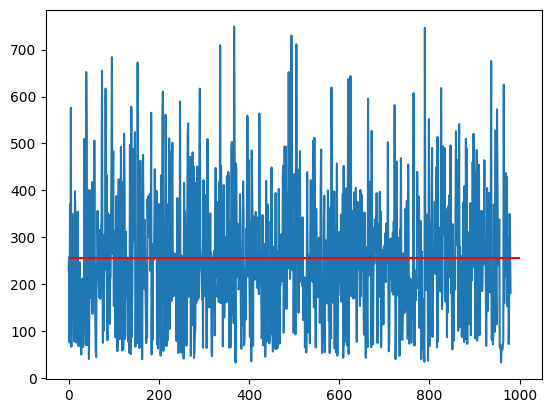

In [11]:
x = [i for i in range(len(coor))]
y = [coor[j][1] for j in range(len(coor))]
print(min(y))
print(max(y))
avg = sum(y)/len(y)
print(avg)
plt.plot(x,y)
plt.hlines(avg, 0 ,1000, color='red')
plt.savefig('4LTrainingTime.png')

### Training search types
collecting all search types for graphing

In [13]:
names = []
allWins = []
allFails = []
allCalls = []

for i in range(len(newDrones)):
    crazy = newDrones[i]
    print(crazy[0][0][1:])
    names.append(crazy[0][0][1:])
    fails = 0
    wins = 0
    callbacks = 0
    for j in crazy:
        case = j[4]
        if case == 0:
            fails+= 1
        elif case == 1:
            wins += 1
        else:
            callbacks+= 1
    allWins.append(wins)
    allFails.append(fails)
    allCalls.append(callbacks)
    print(f'Wins {wins}') 
    print(f'Fails {fails}') 
    print(f'Callbacks {callbacks}') 
    print()
    
di = {
    'Successful Searches': allWins,
    'Unfinished run' : allFails,
    'Callbacks' : allCalls
}
print(sum(allWins), sum(allFails), sum(allCalls))

crazyflie0
Wins 181
Fails 526
Callbacks 274

crazyflie1
Wins 154
Fails 520
Callbacks 307

crazyflie2
Wins 159
Fails 534
Callbacks 288

crazyflie3
Wins 161
Fails 545
Callbacks 275

655 2125 1144


655


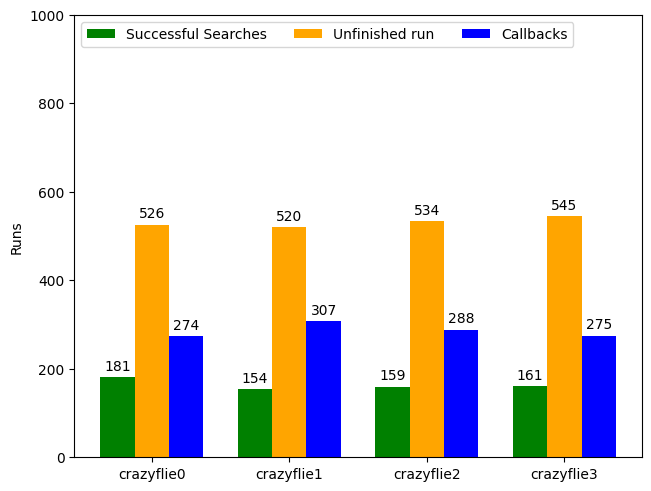

In [14]:
x = np.arange(len(names))  
width = 0.25
multiplier = 0
color = ['green', 'orange', 'blue']

fig, ax = plt.subplots(layout='constrained')

for name, count in di.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=name, color=color[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_ylabel('Runs')
ax.set_xticks(x + width, names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1000)


plt.savefig('4LTraining.png')
print(sum(allWins))

### Training strategies

Select 4 random iteration, add the starting point and sort by iteration for cleaner graph

In [16]:
boxes = [(21.0, -5.0),(15.0, 6.0),(5.0,0.3),(-2.0,7.2),(-2.2, -2.6),(-5.6,-5.9),(20.2, -0.2),(11.59,0.67)]
testCases = []    
for r in range(4):
    index = random.randint(0, len(coor))
    drones = []
    for i in range(len(newDrones)):
        crazy = newDrones[i][index][:]
        box = [boxes[x] for x in crazy[2]]
        box.insert(0, (0.0,0.0))
        crazy.append(box[:])
        drones.append(crazy)
    
    testCases.append(drones)

testCases.sort(key=lambda x: x[0][1])


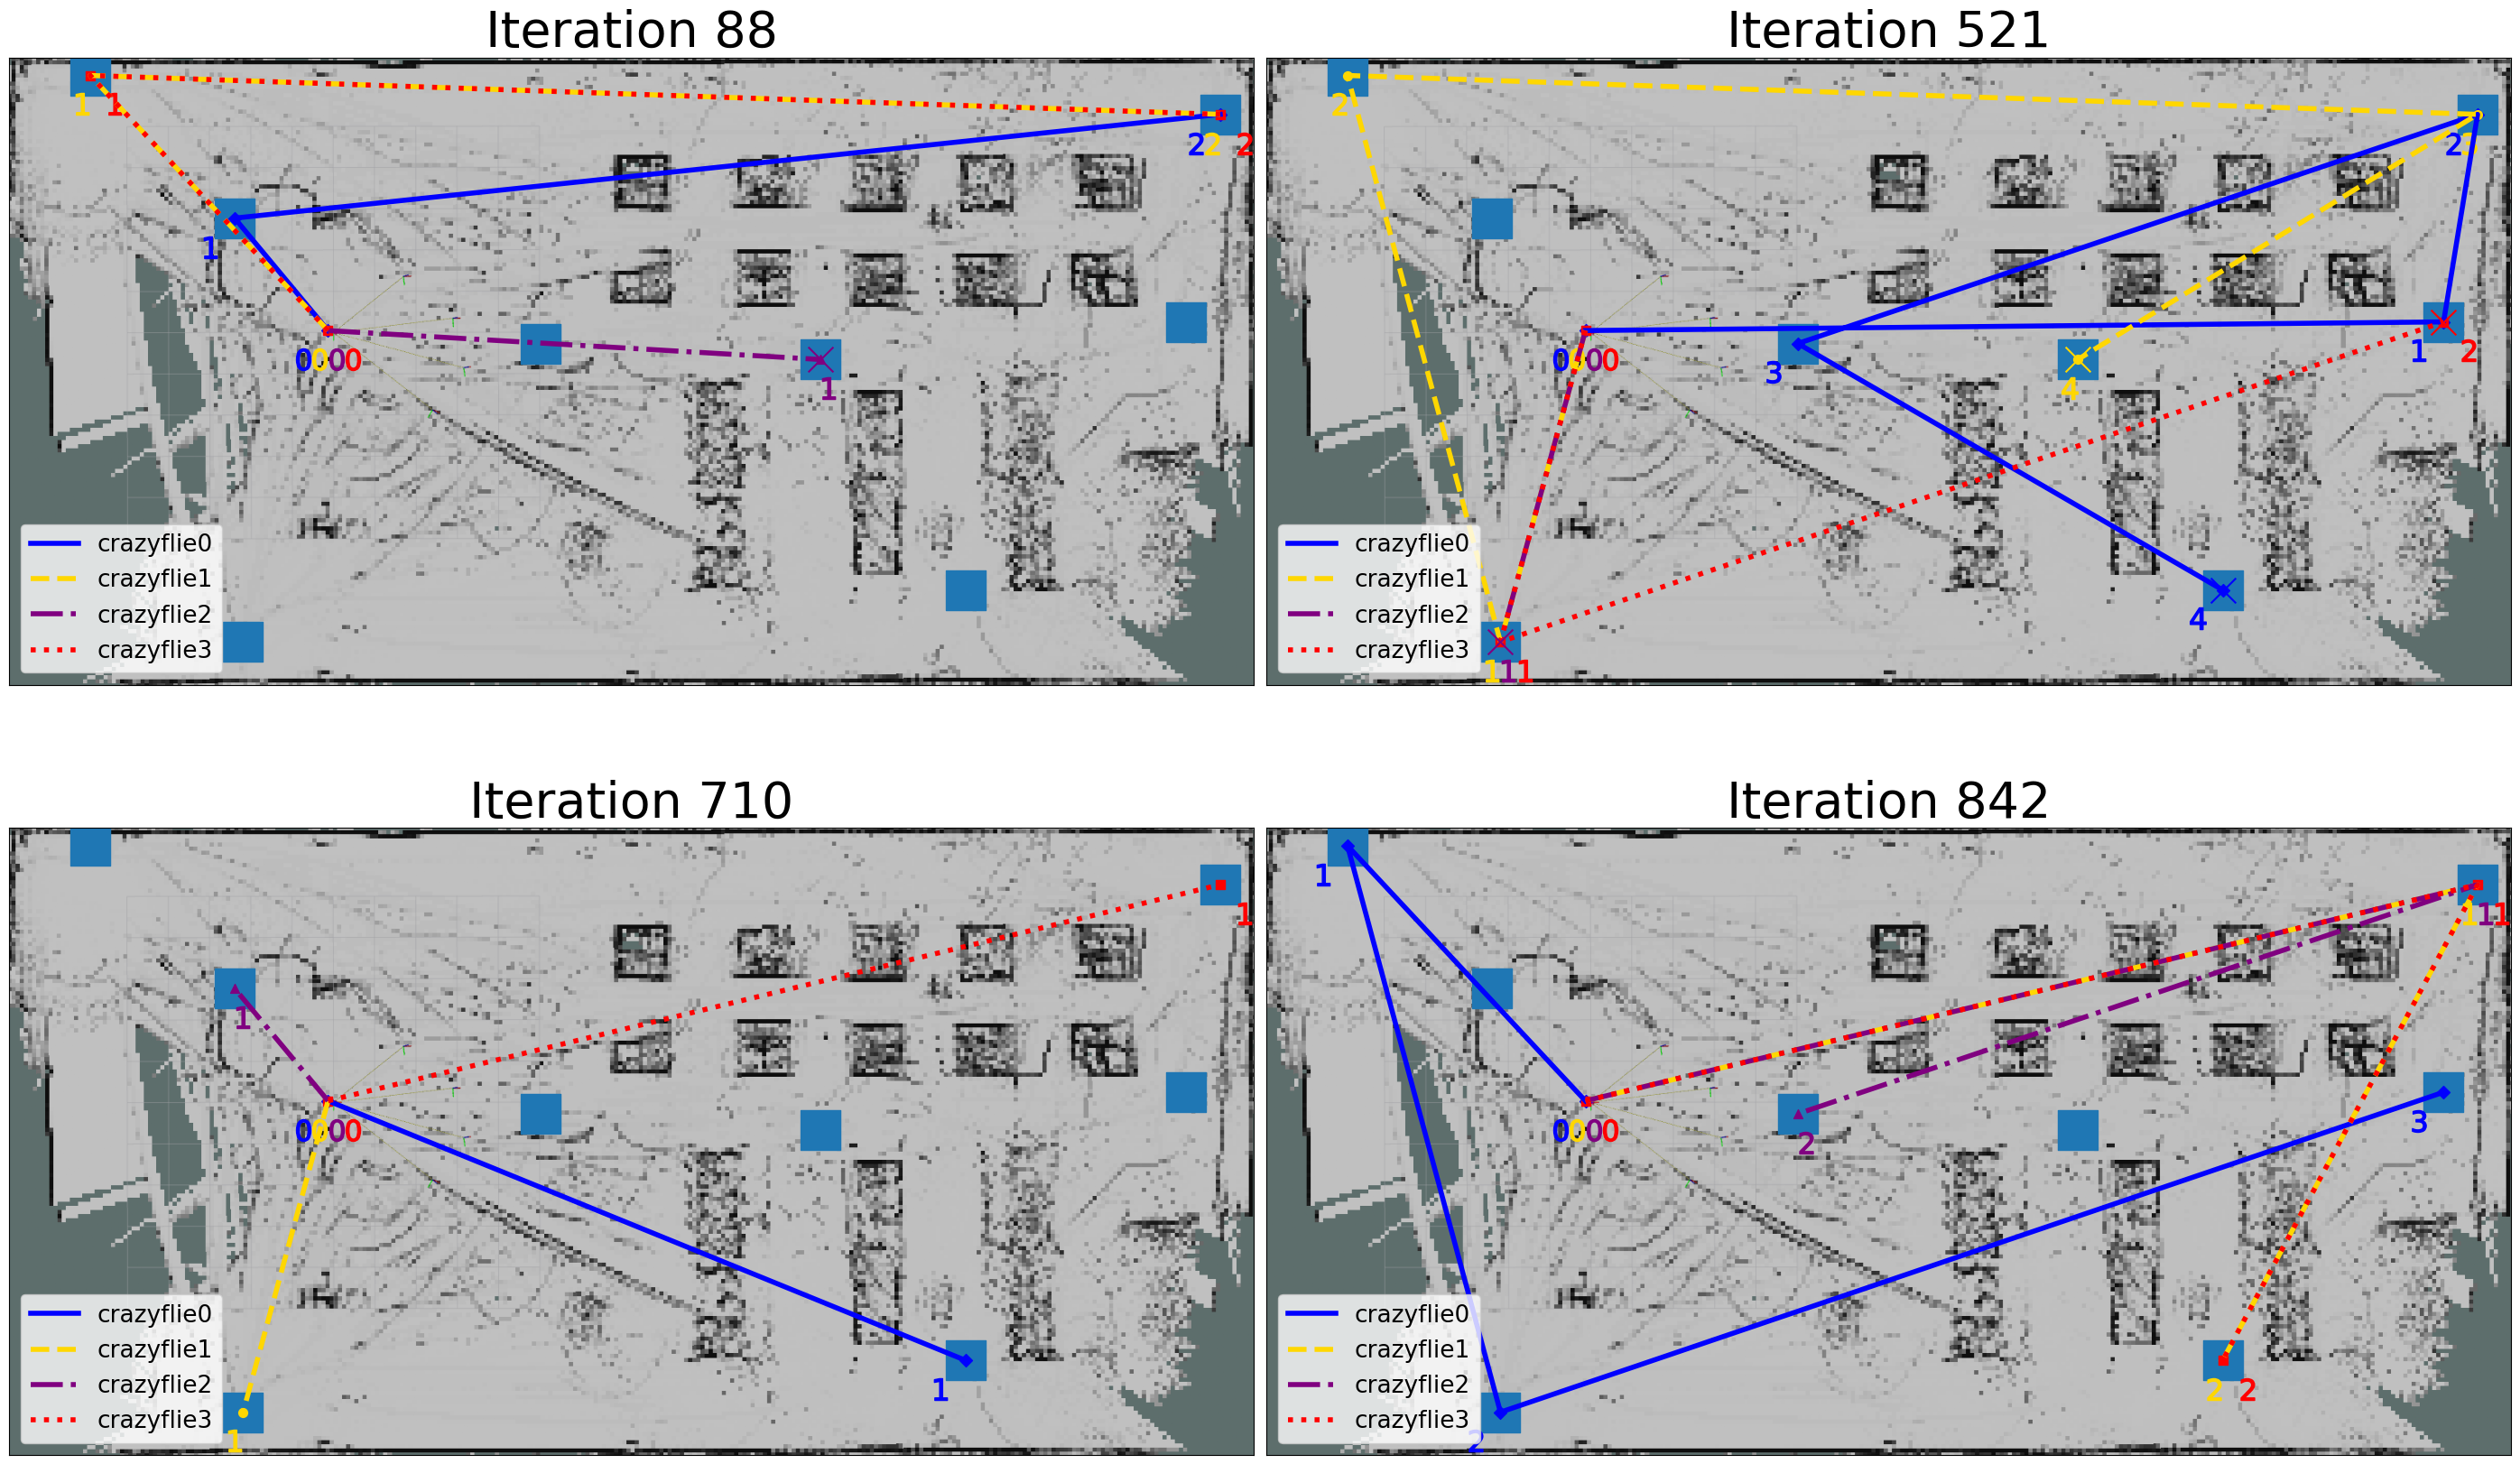

In [17]:
figure(figsize=(28, 18))    
for tes in range(len(testCases)):
    types = ['-','--','-.',':']
    n = ['Cr0','Cr1','Cr2','Cr3']
    color = ["blue",'gold','purple','red']
    shapes = ['D','o','^','s']
    counter = 0
    mult = -1.5
    
    img = imread("FieldM.png")

    plt.subplot(2, 2, tes+1)
    plt.imshow(img,zorder=0)

    
    #Draw boxes
    xb = [(boxes[x][0]+7.5)*51.706 for x in range(len(boxes))]
    yb = [(boxes[x][1]+6.3)*52.62 for x in range(len(boxes))]
    plt.scatter(xb,yb, marker = 's',s=1000)
    
    #Draw all drone trajectories
    for i in testCases[tes]:
        x = [(i[-1][x][0]+7.5)*51.706 for x in range(len(i[-1]))]
        y = [(i[-1][x][1]+6.3)*52.62 for x in range(len(i[-1]))]
        case = i[4]
        
        plt.plot(x,y, ls = types[counter],label=names[counter],linewidth = '4', color = color[counter])
        for i in range(len(x)):
            plt.scatter(x[i],y[i], marker = shapes[counter],s=50, c=color[counter])
            plt.scatter(x[i]+20*mult,y[i]+35, marker = f"${i}$",s=300, c=color[counter])
        if case == 0:
            plt.scatter(x[i],y[i], marker = 'x',s=400, c=color[counter], zorder=20) #Failed spot mark
        counter+= 1
        mult+=1

    plt.legend(loc =3, prop={'size': 19})
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])
    plt.title(f'Iteration {testCases[tes][0][1]}',fontsize = 40)
plt.tight_layout(pad=1.0)
plt.savefig('4LTrainingStrat.png')
plt.show()

## Test data loading

In [19]:
with open('4L/MultiCoor.pkl', 'rb') as f:
    coor = pickle.load(f)
    
drones = []
QEntries = []
for i in range(4):
    with open(f'4L/ExperimentSim3R/crazyflie{i}.pkl', 'rb') as f:
        crazy = pickle.load(f)
        drones.append(crazy)
        

## Data preparation

Checking the different entries for any discrepancy

In [21]:
newDrones = []

for j in range(len(drones)):
    crazy = drones[j]
    recent = 0
    new = [crazy[0]]
    for i in range(len(crazy)):
        if i == 0:
            continue

        if crazy[i-1][1] == crazy[i][1]:
            continue

        new.append(crazy[i])
    print(len(crazy))
    print(len(new))
    newDrones.append(new)

200
200
200
200
200
200
200
200


Calculating the run search times by taking the difference from the previous to the next iteration

In [23]:
for i in range(len(coor)):
    if i == 0:
        continue
    
    coor[i-1][1] = coor[i][1]-coor[i-1][1]
coor.pop(-1)

[200, 1747032619.7054195]

Removing all runs with human intervention (>800 seconds)

In [25]:
pops= []
for i in reversed(range(len(coor))):
    if coor[i][1] > 800:
        pops.append(i)
        for x in range(len(newDrones)):
            newDrones[x].pop(i)
            
        print(coor[i])
        coor.pop(i)
print(len(pops))        

[107, 824.0000457763672]
[94, 14846.869955301285]
2


## Plotting

### Test Search Time
plotting time per iteration

34.64976692199707
667.6300032138824
249.75047301282785


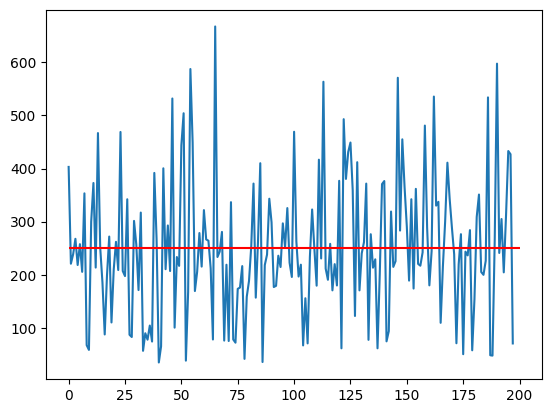

In [27]:
x = [i for i in range(len(coor))]
y = [coor[j][1] for j in range(len(coor))]
print(min(y))
print(max(y))
avg = sum(y)/len(y)
print(avg)
plt.plot(x,y)
plt.hlines(avg, 0 ,200, color='red')
plt.savefig('4LTime.png')

### Test search types
collecting all search types for graphing

In [29]:
names = []
allWins = []
allFails = []
allCalls = []

for i in range(len(newDrones)):
    crazy = newDrones[i]
    print(crazy[0][0][1:])
    names.append(crazy[0][0][1:])
    fails = 0
    wins = 0
    callbacks = 0
    for j in crazy:
        case = j[4]
        if case == 0:
            fails+= 1
        elif case == 1:
            wins += 1
        else:
            callbacks+= 1
    allWins.append(wins)
    allFails.append(fails)
    allCalls.append(callbacks)
    print(f'Wins {wins}') 
    print(f'Fails {fails}') 
    print(f'Callbacks {callbacks}') 
    print()
    
di = {
    'Successful Searches': allWins,
    'Unfinished run' : allFails,
    'Callbacks' : allCalls
}

print(sum(allWins), sum(allFails), sum(allCalls))

crazyflie0
Wins 39
Fails 104
Callbacks 55

crazyflie1
Wins 29
Fails 106
Callbacks 63

crazyflie2
Wins 30
Fails 109
Callbacks 59

crazyflie3
Wins 39
Fails 112
Callbacks 47

137 431 224


137


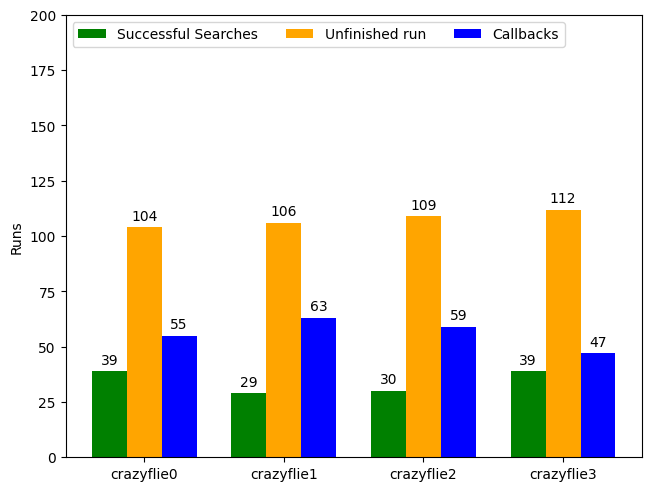

In [30]:
x = np.arange(len(names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
color = ['green', 'orange', 'blue']

fig, ax = plt.subplots(layout='constrained')

for name, count in di.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=name, color=color[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runs')
ax.set_xticks(x + width, names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 200)


plt.savefig('4L.png')
print(sum(allWins))

### Test strategies

Select 4 random iteration, add the starting point and sort by iteration for cleaner graph

In [33]:
boxes = [(21.0, -5.0),(15.0, 6.0),(5.0,0.3),(-2.0,7.2),(-2.2, -2.6),(-5.6,-5.9),(20.2, -0.2),(11.59,0.67)]
testCases = []    
for r in range(4):
    index = random.randint(0, len(coor))
    drones = []
    for i in range(len(newDrones)):
        crazy = newDrones[i][index][:]
        box = [boxes[x] for x in crazy[2]]
        box.insert(0, (0.0,0.0))
        crazy.append(box[:])
        drones.append(crazy)
    
    testCases.append(drones)

testCases.sort(key=lambda x: x[0][1])


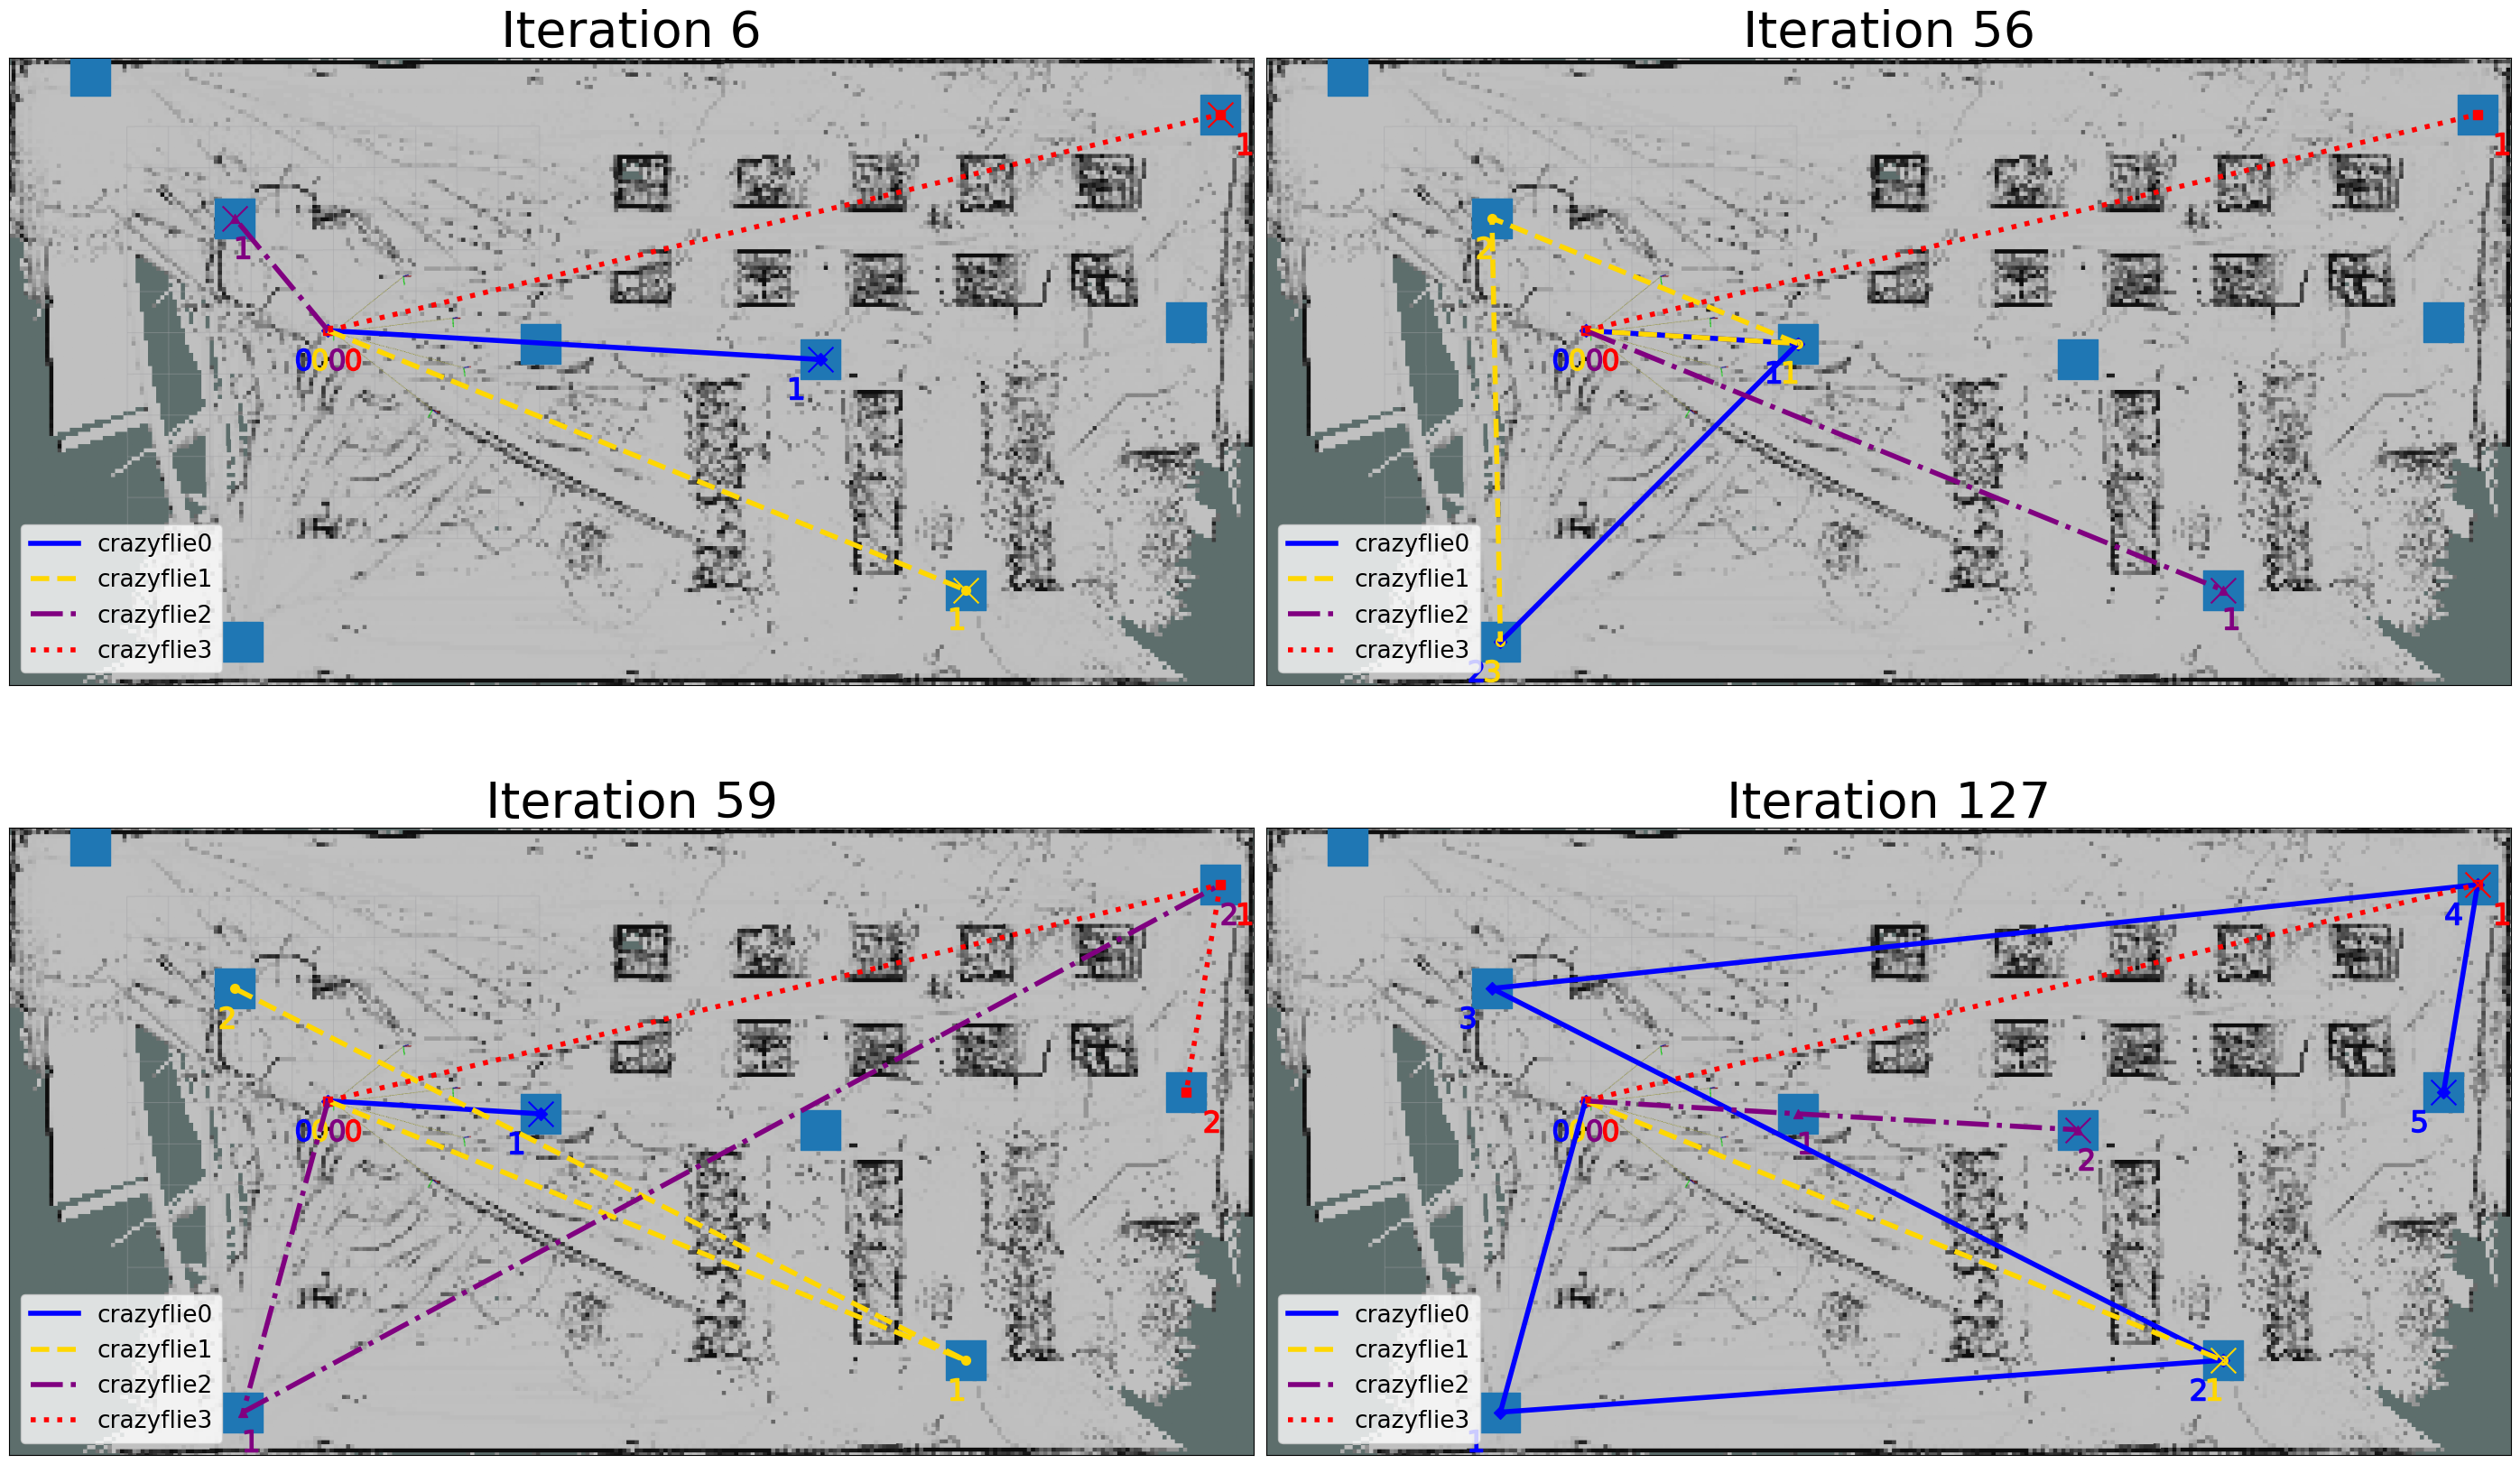

In [34]:
figure(figsize=(28, 18))    
for tes in range(len(testCases)):
    types = ['-','--','-.',':']
    n = ['Cr0','Cr1','Cr2','Cr3']
    color = ["blue",'gold','purple','red']
    shapes = ['D','o','^','s']
    counter = 0
    mult = -1.5
    
    img = imread("FieldM.png")

    plt.subplot(2, 2, tes+1)
    plt.imshow(img,zorder=0)

    #Draw boxes
    xb = [(boxes[x][0]+7.5)*51.706 for x in range(len(boxes))]
    yb = [(boxes[x][1]+6.3)*52.62 for x in range(len(boxes))]
    plt.scatter(xb,yb, marker = 's',s=1000)
    
    #Draw Drone trajectories
    for i in testCases[tes]:
        x = [(i[-1][x][0]+7.5)*51.706 for x in range(len(i[-1]))]
        y = [(i[-1][x][1]+6.3)*52.62 for x in range(len(i[-1]))]
        case = i[4]
        
        plt.plot(x,y, ls = types[counter],label=names[counter],linewidth = '4', color = color[counter])
        for i in range(len(x)):
            plt.scatter(x[i],y[i], marker = shapes[counter],s=50, c=color[counter])
            plt.scatter(x[i]+20*mult,y[i]+35, marker = f"${i}$",s=300, c=color[counter])
        if case == 0:
            plt.scatter(x[i],y[i], marker = 'x',s=400, c=color[counter], zorder=20)
        counter+= 1
        mult+=1

    plt.legend(loc =3, prop={'size': 19})
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])
    plt.title(f'Iteration {testCases[tes][0][1]}',fontsize = 40)
plt.tight_layout(pad=1.0)
plt.savefig('4LStrat.png')
plt.show()